In [47]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.linalg import eig

# Set display options for better readability
pd.set_option('display.precision', 4)
pd.set_option('display.width', None)
np.set_printoptions(precision=4, suppress=True)

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

In [11]:
# Define the criteria and alternatives
criteria = ['Cost per Unit', 'Delivery Time', 'Quality Score', 'Innovation Index', 'Sustainability Score']
alternatives = ['GTS', 'ISC', 'RCI', 'ETP']

print("Decision Elements:")
print("="*30)
print(f"Goal: Select Best Supplier")
print(f"Criteria ({len(criteria)}): {', '.join(criteria)}")
print(f"Alternatives ({len(alternatives)}): {', '.join(alternatives)}")

Decision Elements:
Goal: Select Best Supplier
Criteria (5): Cost per Unit, Delivery Time, Quality Score, Innovation Index, Sustainability Score
Alternatives (4): GTS, ISC, RCI, ETP


In [12]:
# Criteria Pairwise Comparison Matrix
# Based on decision maker's preferences:
# Camera Quality is most important (photography enthusiast)
# Battery Life is very important (travel needs)
# Performance is moderately important
# Display Quality is somewhat important
# Price is least important (willing to pay premium)

criteria_matrix = np.array([
    [1,   3,   1/3, 5,   7],
    [1/3, 1,   1/5, 3,   5],
    [3,   5,   1,   7,   9],
    [1/5, 1/3, 1/7, 1,   2],
    [1/7, 1/5, 1/9, 1/2, 1]
])

print("CRITERIA PAIRWISE COMPARISON MATRIX:")
print("="*50)
criteria_df = pd.DataFrame(criteria_matrix, index=criteria, columns=criteria)
print(criteria_df.to_string(float_format='%.3f'))

# Verify matrix properties
print(f"\nMatrix Properties:")
print(f"- Matrix size: {criteria_matrix.shape}")
print(f"- Reciprocal property: {np.allclose(criteria_matrix, 1/criteria_matrix.T)}")
print(f"- Diagonal elements all 1: {np.allclose(np.diag(criteria_matrix), 1)}")

CRITERIA PAIRWISE COMPARISON MATRIX:
                      Cost per Unit  Delivery Time  Quality Score  Innovation Index  Sustainability Score
Cost per Unit                 1.000          3.000          0.333             5.000                 7.000
Delivery Time                 0.333          1.000          0.200             3.000                 5.000
Quality Score                 3.000          5.000          1.000             7.000                 9.000
Innovation Index              0.200          0.333          0.143             1.000                 2.000
Sustainability Score          0.143          0.200          0.111             0.500                 1.000

Matrix Properties:
- Matrix size: (5, 5)
- Reciprocal property: True
- Diagonal elements all 1: True


In [13]:
print(criteria_df.to_string(float_format='%.3f'))

                      Cost per Unit  Delivery Time  Quality Score  Innovation Index  Sustainability Score
Cost per Unit                 1.000          3.000          0.333             5.000                 7.000
Delivery Time                 0.333          1.000          0.200             3.000                 5.000
Quality Score                 3.000          5.000          1.000             7.000                 9.000
Innovation Index              0.200          0.333          0.143             1.000                 2.000
Sustainability Score          0.143          0.200          0.111             0.500                 1.000


In [14]:
# Alternative Comparison Matrices for each criterion
# Define alternative comparison matrices for each criterion
# Cost per Unit
cost_per_unit_matrix = np.array([
    [1,   3,   5,   7],
    [1/3, 1,   3,   5],
    [1/5, 1/3, 1,   3],
    [1/7, 1/5, 1/3, 1]
])

# Delivery Time
delivery_time_matrix = np.array([
    [1,   1/3, 3,   5],
    [3,   1,   5,   7],
    [1/3, 1/5, 1,   3],
    [1/5, 1/7, 1/3, 1]
])

# Quality Score
quality_score_matrix = np.array([
    [1,   3,   1/3, 5],
    [1/3, 1,   1/5, 3],
    [3,   5,   1,   7],
    [1/5, 1/3, 1/7, 1]
])

# Innovation Index
innovation_index_matrix = np.array([
    [1,   1/5, 3,   1/3],
    [5,   1,   7,   3],
    [1/3, 1/7, 1,   1/5],
    [3,   1/3, 5,   1]
])

# Sustainability Score
sustainability_score_matrix = np.array([
    [1,   3,   1/5, 1/7],
    [1/3, 1,   1/7, 1/9],
    [5,   7,   1,   1/3],
    [7,   9,   3,   1]
])

# Store all matrices in a dictionary
alternative_matrices = {
    'Cost per Unit': cost_per_unit_matrix,
    'Delivery Time': delivery_time_matrix,
    'Quality Score': quality_score_matrix,
    'Innovation Index': innovation_index_matrix,
    'Sustainability Score': sustainability_score_matrix
}

print("ALTERNATIVE COMPARISON MATRICES:")
print("="*50)
for criterion, matrix in alternative_matrices.items():
    print(f"\n{criterion}:")
    alt_df = pd.DataFrame(matrix, index=alternatives, columns=alternatives)
    print(alt_df.to_string(float_format='%.3f'))

ALTERNATIVE COMPARISON MATRICES:

Cost per Unit:
      GTS   ISC   RCI   ETP
GTS 1.000 3.000 5.000 7.000
ISC 0.333 1.000 3.000 5.000
RCI 0.200 0.333 1.000 3.000
ETP 0.143 0.200 0.333 1.000

Delivery Time:
      GTS   ISC   RCI   ETP
GTS 1.000 0.333 3.000 5.000
ISC 3.000 1.000 5.000 7.000
RCI 0.333 0.200 1.000 3.000
ETP 0.200 0.143 0.333 1.000

Quality Score:
      GTS   ISC   RCI   ETP
GTS 1.000 3.000 0.333 5.000
ISC 0.333 1.000 0.200 3.000
RCI 3.000 5.000 1.000 7.000
ETP 0.200 0.333 0.143 1.000

Innovation Index:
      GTS   ISC   RCI   ETP
GTS 1.000 0.200 3.000 0.333
ISC 5.000 1.000 7.000 3.000
RCI 0.333 0.143 1.000 0.200
ETP 3.000 0.333 5.000 1.000

Sustainability Score:
      GTS   ISC   RCI   ETP
GTS 1.000 3.000 0.200 0.143
ISC 0.333 1.000 0.143 0.111
RCI 5.000 7.000 1.000 0.333
ETP 7.000 9.000 3.000 1.000


In [15]:
# AHP Priority Calculation Functions

def calculate_geometric_mean_priorities(matrix):
    """
    Calculate priorities using geometric mean method
    """
    n = matrix.shape[0]
    priorities = np.zeros(n)

    for i in range(n):
        # Geometric mean of row i
        product = np.prod(matrix[i, :])
        priorities[i] = product ** (1/n)

    # Normalize to sum to 1
    priorities = priorities / np.sum(priorities)

    return priorities

def calculate_eigenvalue_priorities(matrix):
    """
    Calculate priorities using eigenvalue method
    """
    # Calculate eigenvalues and eigenvectors
    eigenvals, eigenvecs = eig(matrix)

    # Find principal eigenvalue (largest)
    principal_idx = np.argmax(eigenvals.real)
    principal_eigenval = eigenvals[principal_idx].real
    principal_eigenvec = eigenvecs[:, principal_idx].real

    # Normalize eigenvector to get priorities
    priorities = principal_eigenvec / np.sum(principal_eigenvec)

    return priorities, principal_eigenval

def calculate_consistency_ratio(matrix, eigenval):
    """
    Calculate consistency ratio for a comparison matrix
    """
    n = matrix.shape[0]

    # Random Index values (from Saaty's work)
    RI_dict = {
        1: 0.00, 2: 0.00, 3: 0.58, 4: 0.90, 5: 1.12,
        6: 1.24, 7: 1.32, 8: 1.41, 9: 1.45, 10: 1.49
    }

    if n in RI_dict:
        RI = RI_dict[n]
    else:
        RI = 1.49  # For n > 10

    if n <= 2:
        return 0.0, 0.0  # Perfect consistency for n=1,2

    # Consistency Index
    CI = (eigenval - n) / (n - 1)

    # Consistency Ratio
    CR = CI / RI if RI > 0 else 0.0

    return CI, CR

In [16]:
# Calculate Criteria Priorities

print("CRITERIA PRIORITIES CALCULATION:")
print("="*50)

# Geometric Mean Method
criteria_priorities_gm = calculate_geometric_mean_priorities(criteria_matrix)

# Eigenvalue Method
criteria_priorities_ev, criteria_eigenval = calculate_eigenvalue_priorities(criteria_matrix)

# Consistency Analysis
criteria_CI, criteria_CR = calculate_consistency_ratio(criteria_matrix, criteria_eigenval)

print("Geometric Mean Priorities:")
for i, (criterion, priority) in enumerate(zip(criteria, criteria_priorities_gm)):
    print(f"{i+1}. {criterion:<15}: {priority:.4f} ({priority*100:.1f}%)")

print(f"\nEigenvalue Method:")
print(f"Principal Eigenvalue: {criteria_eigenval:.4f}")
print(f"Consistency Index (CI): {criteria_CI:.4f}")
print(f"Consistency Ratio (CR): {criteria_CR:.4f}")

if criteria_CR <= 0.10:
    print("Acceptable consistency (CR ≤ 0.10)")
else:
    print("Inconsistent judgments (CR > 0.10) - Consider revising comparisons")

# Use eigenvalue method priorities for final analysis
criteria_weights = criteria_priorities_ev

CRITERIA PRIORITIES CALCULATION:
Geometric Mean Priorities:
1. Cost per Unit  : 0.2644 (26.4%)
2. Delivery Time  : 0.1299 (13.0%)
3. Quality Score  : 0.5112 (51.1%)
4. Innovation Index: 0.0588 (5.9%)
5. Sustainability Score: 0.0358 (3.6%)

Eigenvalue Method:
Principal Eigenvalue: 5.1848
Consistency Index (CI): 0.0462
Consistency Ratio (CR): 0.0412
Acceptable consistency (CR ≤ 0.10)


In [17]:
# Consistency Analysis for All Matrices

print("CONSISTENCY ANALYSIS:")
print("="*50)

consistency_results = {}

# Check criteria matrix consistency (already calculated above)
consistency_results['Criteria'] = {
    'CI': criteria_CI,
    'CR': criteria_CR,
    'Consistent': criteria_CR <= 0.10
}

# Check alternative matrices consistency
for criterion, matrix in alternative_matrices.items():
    priorities, eigenval = calculate_eigenvalue_priorities(matrix)
    CI, CR = calculate_consistency_ratio(matrix, eigenval)

    consistency_results[criterion] = {
        'CI': CI,
        'CR': CR,
        'Consistent': CR <= 0.10
    }

# Display results
print("Matrix Consistency Results:")
print("-" * 60)
print(f"{'Matrix':<15} {'CI':<8} {'CR':<8} {'Status':<12}")
print("-" * 60)

for matrix_name, results in consistency_results.items():
    status = "OK" if results['Consistent'] else "Revise"
    print(f"{matrix_name:<15} {results['CI']:<8.4f} {results['CR']:<8.4f} {status}")

print("-" * 60)

# Overall assessment
inconsistent_matrices = [name for name, res in consistency_results.items() if not res['Consistent']]
if inconsistent_matrices:
    print(f"{len(inconsistent_matrices)} matrices need revision: {', '.join(inconsistent_matrices)}")
else:
    print("All matrices have acceptable consistency.")

CONSISTENCY ANALYSIS:
Matrix Consistency Results:
------------------------------------------------------------
Matrix          CI       CR       Status      
------------------------------------------------------------
Criteria        0.0462   0.0412   OK
Cost per Unit   0.0390   0.0433   OK
Delivery Time   0.0390   0.0433   OK
Quality Score   0.0390   0.0433   OK
Innovation Index 0.0390   0.0433   OK
Sustainability Score 0.0549   0.0610   OK
------------------------------------------------------------
All matrices have acceptable consistency.


In [18]:
# Calculate alternative priorities for each criterion
alternative_priorities = {}
for criterion, matrix in alternative_matrices.items():
    priorities, _ = calculate_eigenvalue_priorities(matrix)
    alternative_priorities[criterion] = priorities

print(f"\nALTERNATIVE PRIORITIES BY CRITERION:")
print("="*50)
for criterion, priorities in alternative_priorities.items():
    print(f"\n{criterion}:")
    for i, (alt, priority) in enumerate(zip(alternatives, priorities)):
        print(f"  {i+1}. {alt:<20}: {priority:.4f} ({priority*100:.1f}%)")


ALTERNATIVE PRIORITIES BY CRITERION:

Cost per Unit:
  1. GTS                 : 0.5650 (56.5%)
  2. ISC                 : 0.2622 (26.2%)
  3. RCI                 : 0.1175 (11.8%)
  4. ETP                 : 0.0553 (5.5%)

Delivery Time:
  1. GTS                 : 0.2622 (26.2%)
  2. ISC                 : 0.5650 (56.5%)
  3. RCI                 : 0.1175 (11.8%)
  4. ETP                 : 0.0553 (5.5%)

Quality Score:
  1. GTS                 : 0.2622 (26.2%)
  2. ISC                 : 0.1175 (11.8%)
  3. RCI                 : 0.5650 (56.5%)
  4. ETP                 : 0.0553 (5.5%)

Innovation Index:
  1. GTS                 : 0.1175 (11.8%)
  2. ISC                 : 0.5650 (56.5%)
  3. RCI                 : 0.0553 (5.5%)
  4. ETP                 : 0.2622 (26.2%)

Sustainability Score:
  1. GTS                 : 0.0849 (8.5%)
  2. ISC                 : 0.0425 (4.2%)
  3. RCI                 : 0.2895 (29.0%)
  4. ETP                 : 0.5831 (58.3%)


In [19]:
# Synthesis and Final Ranking

# Create synthesis matrix: alternatives x criteria
synthesis_matrix = np.zeros((len(alternatives), len(criteria)))

for i, alt in enumerate(alternatives):
    for j, criterion in enumerate(criteria):
        synthesis_matrix[i, j] = alternative_priorities[criterion][i]

# Calculate final scores: weighted sum
final_scores = np.dot(synthesis_matrix, criteria_weights)

# Create results dataframe
results_df = pd.DataFrame({
    'Alternative': alternatives,
    'Final Score': final_scores
})

# Add ranking
results_df = results_df.sort_values('Final Score', ascending=False).reset_index(drop=True)
results_df['Rank'] = range(1, len(results_df) + 1)

In [20]:
print("AHP SYNTHESIS AND FINAL RANKING:")
print("="*60)
print("CRITERIA WEIGHTS:")
print("-" * 30)
for i, (criterion, weight) in enumerate(zip(criteria, criteria_weights)):
    print(f"{i+1}. {criterion:<15}: {weight:.4f} ({weight*100:.1f}%)")

print(f"\nSYNTHESIS MATRIX (Alternative Priorities by Criterion):")
print("-" * 60)
synth_df = pd.DataFrame(synthesis_matrix, index=alternatives, columns=criteria)
print(synth_df.to_string(float_format='%.4f'))

AHP SYNTHESIS AND FINAL RANKING:
CRITERIA WEIGHTS:
------------------------------
1. Cost per Unit  : 0.2621 (26.2%)
2. Delivery Time  : 0.1293 (12.9%)
3. Quality Score  : 0.5154 (51.5%)
4. Innovation Index: 0.0575 (5.7%)
5. Sustainability Score: 0.0357 (3.6%)

SYNTHESIS MATRIX (Alternative Priorities by Criterion):
------------------------------------------------------------
     Cost per Unit  Delivery Time  Quality Score  Innovation Index  Sustainability Score
GTS         0.5650         0.2622         0.2622            0.1175                0.0849
ISC         0.2622         0.5650         0.1175            0.5650                0.0425
RCI         0.1175         0.1175         0.5650            0.0553                0.2895
ETP         0.0553         0.0553         0.0553            0.2622                0.5831


In [21]:
print(f"\nFINAL AHP SCORES AND RANKING:")
print("-" * 50)
for idx, row in results_df.iterrows():
    print(f"{row['Rank']}. {row['Alternative']:<20}: {row['Final Score']:.4f}")

print(f"\n{'='*50}")
print("BEST CHOICE: " + results_df.iloc[0]['Alternative'])
print(f"Score: {results_df.iloc[0]['Final Score']:.4f}")
print("="*50)


FINAL AHP SCORES AND RANKING:
--------------------------------------------------
1. RCI                 : 0.3507
2. GTS                 : 0.3269
3. ISC                 : 0.2364
4. ETP                 : 0.0860

BEST CHOICE: RCI
Score: 0.3507


In [23]:
# Detailed breakdown for each alternative
print(f"\nDETAILED BREAKDOWN:")
print("-" * 70)
for i, alt in enumerate(alternatives):
    print(f"\n{alt}:")
    total = 0
    for j, criterion in enumerate(criteria):
        contribution = synthesis_matrix[i, j] * criteria_weights[j]
        total += contribution
        print(f"  {criterion:<15}: {synthesis_matrix[i, j]:.4f} × {criteria_weights[j]:.4f} = {contribution:.4f}")
    print(f"  {'Total Score':<15}: {total:.4f}")


DETAILED BREAKDOWN:
----------------------------------------------------------------------

GTS:
  Cost per Unit  : 0.5650 × 0.2621 = 0.1481
  Delivery Time  : 0.2622 × 0.1293 = 0.0339
  Quality Score  : 0.2622 × 0.5154 = 0.1351
  Innovation Index: 0.1175 × 0.0575 = 0.0068
  Sustainability Score: 0.0849 × 0.0357 = 0.0030
  Total Score    : 0.3269

ISC:
  Cost per Unit  : 0.2622 × 0.2621 = 0.0687
  Delivery Time  : 0.5650 × 0.1293 = 0.0731
  Quality Score  : 0.1175 × 0.5154 = 0.0606
  Innovation Index: 0.5650 × 0.0575 = 0.0325
  Sustainability Score: 0.0425 × 0.0357 = 0.0015
  Total Score    : 0.2364

RCI:
  Cost per Unit  : 0.1175 × 0.2621 = 0.0308
  Delivery Time  : 0.1175 × 0.1293 = 0.0152
  Quality Score  : 0.5650 × 0.5154 = 0.2912
  Innovation Index: 0.0553 × 0.0575 = 0.0032
  Sustainability Score: 0.2895 × 0.0357 = 0.0103
  Total Score    : 0.3507

ETP:
  Cost per Unit  : 0.0553 × 0.2621 = 0.0145
  Delivery Time  : 0.0553 × 0.1293 = 0.0072
  Quality Score  : 0.0553 × 0.5154 = 0.0

## AHP Method: Advantages and Disadvantages

### Advantages

1. **Structured Approach**: Provides a systematic framework for complex decision making
2. **Handles Qualitative Data**: Can incorporate subjective judgments and qualitative factors
3. **Mathematical Rigor**: Based on solid mathematical foundations (eigenvalue theory)
4. **Consistency Measurement**: Quantifies the consistency of decision maker judgments
5. **Hierarchical Analysis**: Breaks down complex problems into manageable sub-problems
6. **Group Decision Support**: Can be used for group decision making with multiple stakeholders
7. **Transparency**: Decision process is clear and can be easily communicated
8. **Flexibility**: Applicable to wide range of decision problems
9. **Sensitivity Analysis**: Allows testing of different scenarios and assumptions
10. **Wide Applications**: Successfully applied to thousands of real-world problems

### Disadvantages

1. **Time-Consuming**: Requires many pairwise comparisons (n(n-1)/2 for n elements)
2. **Subjectivity**: Results depend on decision maker's judgments
3. **Scalability Issues**: Becomes complex with many criteria/alternatives (>7-9 elements)
4. **Rank Reversal**: Can produce different rankings when alternatives are added/removed
5. **Assumption of Independence**: Assumes criteria are independent
6. **Ratio Scale Issues**: 1-9 scale may not capture all nuances of preference
7. **Computational Complexity**: Eigenvalue calculations can be complex for large matrices
8. **Context Dependency**: Results may vary with different contexts or decision makers
9. **Data Requirements**: Requires complete pairwise comparison matrices

### When to Use AHP

**Best for:**
- Complex decisions with multiple criteria and stakeholders
- Problems requiring systematic analysis of qualitative factors
- Situations where decision rationale needs to be transparent
- Group decision making scenarios
- Problems with hierarchical structure
- When consistency of judgments is important

**Avoid when:**
- Simple decisions with few criteria
- Large number of alternatives (>7-9)
- Time constraints are critical
- Decision makers cannot provide consistent judgments
- Real-time decision making is required
- Data is primarily quantitative and objective

### Key Takeaways

1. **Consistency is Crucial**: Always check CR and revise inconsistent judgments
2. **Scale Usage**: Understand and properly use the 1-9 fundamental scale
3. **Hierarchy Design**: Carefully structure the decision hierarchy
4. **Stakeholder Involvement**: Include relevant stakeholders in pairwise comparisons
5. **Sensitivity Analysis**: Test robustness of results with different assumptions
6. **Documentation**: Record all matrices and assumptions for future reference
7. **Validation**: Compare AHP results with other methods when possible
8. **Scale Appropriately**: Limit to 7±2 elements per level for reliable results

# Complete AHP Implementation Using PyMCDM

In [24]:
# Import required libraries
import numpy as np
import pandas as pd
from pymcdm.weights.subjective import AHP

# Set display options for better readability
pd.set_option('display.precision', 4)
np.set_printoptions(precision=4, suppress=True)

In [25]:
# Define the criteria and alternatives
criteria = ['Cost per Unit', 'Delivery Time', 'Quality Score', 'Innovation Index', 'Sustainability Score']
alternatives = ['GTS', 'ISC', 'RCI', 'ETP']

print("Decision Elements:")
print("="*30)
print(f"Goal: Select Best Supplier")
print(f"Criteria ({len(criteria)}): {', '.join(criteria)}")
print(f"Alternatives ({len(alternatives)}): {', '.join(alternatives)}")

Decision Elements:
Goal: Select Best Supplier
Criteria (5): Cost per Unit, Delivery Time, Quality Score, Innovation Index, Sustainability Score
Alternatives (4): GTS, ISC, RCI, ETP


In [26]:
# Criteria Pairwise Comparison Matrix
# Based on decision maker's preferences:
# Camera Quality is most important (photography enthusiast)
# Battery Life is very important (travel needs)
# Performance is moderately important
# Display Quality is somewhat important
# Price is least important (willing to pay premium)

criteria_matrix = np.array([
    [1,   3,   1/3, 5,   7],
    [1/3, 1,   1/5, 3,   5],
    [3,   5,   1,   7,   9],
    [1/5, 1/3, 1/7, 1,   2],
    [1/7, 1/5, 1/9, 1/2, 1]
])

print("CRITERIA PAIRWISE COMPARISON MATRIX:")
print("="*50)
criteria_df = pd.DataFrame(criteria_matrix, index=criteria, columns=criteria)
print(criteria_df.to_string(float_format='%.3f'))

# Verify matrix properties
print(f"\nMatrix Properties:")
print(f"- Matrix size: {criteria_matrix.shape}")
print(f"- Reciprocal property: {np.allclose(criteria_matrix, 1/criteria_matrix.T)}")
print(f"- Diagonal elements all 1: {np.allclose(np.diag(criteria_matrix), 1)}")

CRITERIA PAIRWISE COMPARISON MATRIX:
                      Cost per Unit  Delivery Time  Quality Score  Innovation Index  Sustainability Score
Cost per Unit                 1.000          3.000          0.333             5.000                 7.000
Delivery Time                 0.333          1.000          0.200             3.000                 5.000
Quality Score                 3.000          5.000          1.000             7.000                 9.000
Innovation Index              0.200          0.333          0.143             1.000                 2.000
Sustainability Score          0.143          0.200          0.111             0.500                 1.000

Matrix Properties:
- Matrix size: (5, 5)
- Reciprocal property: True
- Diagonal elements all 1: True


In [43]:
# Create AHP object and calculate weights
criteria_ahp = AHP(matrix=criteria_matrix)
criteria_weights = criteria_ahp()

print("Criteria Weights:")
print("-" * 40)
for i, (criterion, weight) in enumerate(zip(criteria, criteria_weights)):
    print(f"{i+1}. {criterion:<18}: {weight:.4f} ({weight*100:.1f}%)")

# Show the ranking of criteria by importance
criteria_ranking = sorted(zip(criteria, criteria_weights), key=lambda x: x[1], reverse=True)
print(f"\nCriteria Ranking by Importance:")
print("-" * 40)
for rank, (criterion, weight) in enumerate(criteria_ranking, 1):
    print(f"{rank}. {criterion:<18}: {weight:.4f}")

print(f"\nSum of weights: {np.sum(criteria_weights):.4f} (should be 1.0000)")

Criteria Weights:
----------------------------------------
1. Cost per Unit     : 0.2621 (26.2%)
2. Delivery Time     : 0.1293 (12.9%)
3. Quality Score     : 0.5154 (51.5%)
4. Innovation Index  : 0.0575 (5.7%)
5. Sustainability Score: 0.0357 (3.6%)

Criteria Ranking by Importance:
----------------------------------------
1. Quality Score     : 0.5154
2. Cost per Unit     : 0.2621
3. Delivery Time     : 0.1293
4. Innovation Index  : 0.0575
5. Sustainability Score: 0.0357

Sum of weights: 1.0000 (should be 1.0000)


In [29]:
# Alternative Comparison Matrices for each criterion
# Define alternative comparison matrices for each criterion
# Cost per Unit
cost_per_unit_matrix = np.array([
    [1,   3,   5,   7],
    [1/3, 1,   3,   5],
    [1/5, 1/3, 1,   3],
    [1/7, 1/5, 1/3, 1]
])

# Delivery Time
delivery_time_matrix = np.array([
    [1,   1/3, 3,   5],
    [3,   1,   5,   7],
    [1/3, 1/5, 1,   3],
    [1/5, 1/7, 1/3, 1]
])

# Quality Score
quality_score_matrix = np.array([
    [1,   3,   1/3, 5],
    [1/3, 1,   1/5, 3],
    [3,   5,   1,   7],
    [1/5, 1/3, 1/7, 1]
])

# Innovation Index
innovation_index_matrix = np.array([
    [1,   1/5, 3,   1/3],
    [5,   1,   7,   3],
    [1/3, 1/7, 1,   1/5],
    [3,   1/3, 5,   1]
])

# Sustainability Score
sustainability_score_matrix = np.array([
    [1,   3,   1/5, 1/7],
    [1/3, 1,   1/7, 1/9],
    [5,   7,   1,   1/3],
    [7,   9,   3,   1]
])

# Store all matrices in a dictionary
alternative_matrices = {
    'Cost per Unit': cost_per_unit_matrix,
    'Delivery Time': delivery_time_matrix,
    'Quality Score': quality_score_matrix,
    'Innovation Index': innovation_index_matrix,
    'Sustainability Score': sustainability_score_matrix
}

print("ALTERNATIVE COMPARISON MATRICES:")
print("="*50)
for criterion, matrix in alternative_matrices.items():
    print(f"\n{criterion}:")
    alt_df = pd.DataFrame(matrix, index=alternatives, columns=alternatives)
    print(alt_df.to_string(float_format='%.3f'))

ALTERNATIVE COMPARISON MATRICES:

Cost per Unit:
      GTS   ISC   RCI   ETP
GTS 1.000 3.000 5.000 7.000
ISC 0.333 1.000 3.000 5.000
RCI 0.200 0.333 1.000 3.000
ETP 0.143 0.200 0.333 1.000

Delivery Time:
      GTS   ISC   RCI   ETP
GTS 1.000 0.333 3.000 5.000
ISC 3.000 1.000 5.000 7.000
RCI 0.333 0.200 1.000 3.000
ETP 0.200 0.143 0.333 1.000

Quality Score:
      GTS   ISC   RCI   ETP
GTS 1.000 3.000 0.333 5.000
ISC 0.333 1.000 0.200 3.000
RCI 3.000 5.000 1.000 7.000
ETP 0.200 0.333 0.143 1.000

Innovation Index:
      GTS   ISC   RCI   ETP
GTS 1.000 0.200 3.000 0.333
ISC 5.000 1.000 7.000 3.000
RCI 0.333 0.143 1.000 0.200
ETP 3.000 0.333 5.000 1.000

Sustainability Score:
      GTS   ISC   RCI   ETP
GTS 1.000 3.000 0.200 0.143
ISC 0.333 1.000 0.143 0.111
RCI 5.000 7.000 1.000 0.333
ETP 7.000 9.000 3.000 1.000


In [31]:
# Calculate priorities for each criterion using PyMCDM
alternative_priorities_dict = {}

for criterion, matrix in alternative_matrices.items():
    # Create AHP object for this criterion
    ahp_alt = AHP(matrix=matrix)
    priorities = ahp_alt()
    alternative_priorities_dict[criterion] = priorities
    
    print(f"\n{criterion}:")
    print("-" * len(criterion))
    for i, (alt, priority) in enumerate(zip(alternatives, priorities)):
        print(f"  {i+1}. {alt:<22}: {priority:.4f} ({priority*100:.1f}%)")

# Create a summary table of all priorities
print(f"\nALTERNATIVE PRIORITIES SUMMARY TABLE:")
print("=" * 80)
priorities_df = pd.DataFrame(alternative_priorities_dict, index=alternatives)
print(priorities_df.to_string(float_format='%.4f'))

# Verify all priorities sum to 1 for each criterion
print(f"\nPriority Sums by Criterion (should all be 1.0000):")
for criterion, priorities in alternative_priorities_dict.items():
    print(f"{criterion:<18}: {np.sum(priorities):.4f}")


Cost per Unit:
-------------
  1. GTS                   : 0.5650 (56.5%)
  2. ISC                   : 0.2622 (26.2%)
  3. RCI                   : 0.1175 (11.8%)
  4. ETP                   : 0.0553 (5.5%)

Delivery Time:
-------------
  1. GTS                   : 0.2622 (26.2%)
  2. ISC                   : 0.5650 (56.5%)
  3. RCI                   : 0.1175 (11.8%)
  4. ETP                   : 0.0553 (5.5%)

Quality Score:
-------------
  1. GTS                   : 0.2622 (26.2%)
  2. ISC                   : 0.1175 (11.8%)
  3. RCI                   : 0.5650 (56.5%)
  4. ETP                   : 0.0553 (5.5%)

Innovation Index:
----------------
  1. GTS                   : 0.1175 (11.8%)
  2. ISC                   : 0.5650 (56.5%)
  3. RCI                   : 0.0553 (5.5%)
  4. ETP                   : 0.2622 (26.2%)

Sustainability Score:
--------------------
  1. GTS                   : 0.0849 (8.5%)
  2. ISC                   : 0.0425 (4.2%)
  3. RCI                   : 0.2895 (29.0%)


In [32]:
# Create synthesis matrix: alternatives × criteria
n_alternatives = len(alternatives)
n_criteria = len(criteria)
synthesis_matrix_new = np.zeros((n_alternatives, n_criteria))

# Fill the synthesis matrix
for i, alt in enumerate(alternatives):
    for j, criterion in enumerate(criteria):
        synthesis_matrix_new[i, j] = alternative_priorities_dict[criterion][i]

# Calculate final scores using matrix multiplication
final_scores_new = np.dot(synthesis_matrix_new, criteria_weights)

# Create results DataFrame
results_df_new = pd.DataFrame({
    'Alternative': alternatives,
    'Final Score': final_scores_new
})

# Sort by score and add ranking
results_df_new = results_df_new.sort_values('Final Score', ascending=False).reset_index(drop=True)
results_df_new['Rank'] = range(1, len(results_df_new) + 1)

print("SYNTHESIS MATRIX (Alternative Priorities by Criterion):")
print("-" * 60)
synth_df_new = pd.DataFrame(synthesis_matrix_new, index=alternatives, columns=criteria)
print(synth_df_new.to_string(float_format='%.4f'))

print(f"\nCRITERIA WEIGHTS:")
print("-" * 30)
for i, (criterion, weight) in enumerate(zip(criteria, criteria_weights)):
    print(f"{i+1}. {criterion:<18}: {weight:.4f} ({weight*100:.1f}%)")

print(f"\nFINAL AHP RANKING:")
print("-" * 40)
for idx, row in results_df_new.iterrows():
    print(f"{row['Rank']}. {row['Alternative']:<22}: {row['Final Score']:.4f}")

print(f"\n{'='*60}")
print(f"BEST CHOICE: {results_df_new.iloc[0]['Alternative']}")
print(f"FINAL SCORE: {results_df_new.iloc[0]['Final Score']:.4f}")
print("="*60)

SYNTHESIS MATRIX (Alternative Priorities by Criterion):
------------------------------------------------------------
     Cost per Unit  Delivery Time  Quality Score  Innovation Index  Sustainability Score
GTS         0.5650         0.2622         0.2622            0.1175                0.0849
ISC         0.2622         0.5650         0.1175            0.5650                0.0425
RCI         0.1175         0.1175         0.5650            0.0553                0.2895
ETP         0.0553         0.0553         0.0553            0.2622                0.5831

CRITERIA WEIGHTS:
------------------------------
1. Cost per Unit     : 0.2621 (26.2%)
2. Delivery Time     : 0.1293 (12.9%)
3. Quality Score     : 0.5154 (51.5%)
4. Innovation Index  : 0.0575 (5.7%)
5. Sustainability Score: 0.0357 (3.6%)

FINAL AHP RANKING:
----------------------------------------
1. RCI                   : 0.3507
2. GTS                   : 0.3269
3. ISC                   : 0.2364
4. ETP                   : 0.0860



In [33]:
for i, alt in enumerate(alternatives):
    print(f"\n{alt}:")
    print("-" * len(alt))
    total = 0
    
    for j, criterion in enumerate(criteria):
        priority = synthesis_matrix_new[i, j]
        weight = criteria_weights[j]
        contribution = priority * weight
        total += contribution
        
        print(f"  {criterion:<18}: {priority:.4f} × {weight:.4f} = {contribution:.4f}")
    
    print(f"  {'Total Score':<18}: {total:.4f}")
    print(f"  {'Rank':<18}: #{results_df_new[results_df_new['Alternative'] == alt]['Rank'].values[0]}")

# Show contribution by criterion
print(f"\nCONTRIBUTION BY CRITERION:")
print("-" * 50)
contribution_matrix = synthesis_matrix_new * criteria_weights
contribution_df = pd.DataFrame(contribution_matrix, index=alternatives, columns=criteria)

for criterion in criteria:
    print(f"\n{criterion} (Weight: {criteria_weights[criteria.index(criterion)]:.4f}):")
    criterion_contributions = contribution_df[criterion].sort_values(ascending=False)
    for alt, contrib in criterion_contributions.items():
        print(f"  {alt:<22}: {contrib:.4f}")

print(f"\nTOTAL CONTRIBUTION VERIFICATION:")
print(f"Sum of all contributions: {np.sum(contribution_matrix):.4f}")
print(f"Sum of final scores: {np.sum(final_scores_new):.4f}")
print(f"(These should be equal)")


GTS:
---
  Cost per Unit     : 0.5650 × 0.2621 = 0.1481
  Delivery Time     : 0.2622 × 0.1293 = 0.0339
  Quality Score     : 0.2622 × 0.5154 = 0.1351
  Innovation Index  : 0.1175 × 0.0575 = 0.0068
  Sustainability Score: 0.0849 × 0.0357 = 0.0030
  Total Score       : 0.3269
  Rank              : #2

ISC:
---
  Cost per Unit     : 0.2622 × 0.2621 = 0.0687
  Delivery Time     : 0.5650 × 0.1293 = 0.0731
  Quality Score     : 0.1175 × 0.5154 = 0.0606
  Innovation Index  : 0.5650 × 0.0575 = 0.0325
  Sustainability Score: 0.0425 × 0.0357 = 0.0015
  Total Score       : 0.2364
  Rank              : #3

RCI:
---
  Cost per Unit     : 0.1175 × 0.2621 = 0.0308
  Delivery Time     : 0.1175 × 0.1293 = 0.0152
  Quality Score     : 0.5650 × 0.5154 = 0.2912
  Innovation Index  : 0.0553 × 0.0575 = 0.0032
  Sustainability Score: 0.2895 × 0.0357 = 0.0103
  Total Score       : 0.3507
  Rank              : #1

ETP:
---
  Cost per Unit     : 0.0553 × 0.2621 = 0.0145
  Delivery Time     : 0.0553 × 0.1293 = 

In [34]:
# Most important criterion
max_weight_idx = np.argmax(criteria_weights)
print(f"Most Important Criterion: {criteria[max_weight_idx]} ({criteria_weights[max_weight_idx]*100:.1f}%)")

# Least important criterion  
min_weight_idx = np.argmin(criteria_weights)
print(f"Least Important Criterion: {criteria[min_weight_idx]} ({criteria_weights[min_weight_idx]*100:.1f}%)")

# Winner analysis
winner = results_df_new.iloc[0]['Alternative']
winner_score = results_df_new.iloc[0]['Final Score']
runner_up = results_df_new.iloc[1]['Alternative'] 
runner_up_score = results_df_new.iloc[1]['Final Score']

print(f"Winner: {winner} (Score: {winner_score:.4f})")
print(f"Runner-up: {runner_up} (Score: {runner_up_score:.4f})")

# Dominance analysis
print(f"\nDOMINANCE ANALYSIS:")
print("-" * 20)
for criterion in criteria:
    criterion_idx = criteria.index(criterion)
    best_alt_idx = np.argmax(synthesis_matrix_new[:, criterion_idx])
    best_alt = alternatives[best_alt_idx]
    best_score = synthesis_matrix_new[best_alt_idx, criterion_idx]
    print(f"Best in {criterion}: {best_alt} ({best_score:.4f})")

Most Important Criterion: Quality Score (51.5%)
Least Important Criterion: Sustainability Score (3.6%)
Winner: RCI (Score: 0.3507)
Runner-up: GTS (Score: 0.3269)

DOMINANCE ANALYSIS:
--------------------
Best in Cost per Unit: GTS (0.5650)
Best in Delivery Time: ISC (0.5650)
Best in Quality Score: RCI (0.5650)
Best in Innovation Index: ISC (0.5650)
Best in Sustainability Score: ETP (0.5831)


## Sensitivity Analysis in AHP

Sensitivity analysis is a crucial component of the AHP methodology that helps decision-makers understand how robust their decisions are to changes in criteria weights or alternative priorities. It addresses the question: "How much can the input parameters change before the ranking of alternatives changes?"

### Why Perform Sensitivity Analysis?

1. **Validate Decision Robustness**: Ensure that small changes in judgments don't drastically alter the final ranking
2. **Identify Critical Factors**: Understand which criteria or comparisons have the most impact on the final decision
3. **Build Confidence**: Provide stakeholders with confidence intervals for their decisions
4. **Guide Data Collection**: Identify where more precise judgments are needed
5. **Handle Uncertainty**: Account for inherent uncertainty in human judgments

### Types of Sensitivity Analysis in AHP

#### 1. **Criteria Weight Sensitivity**
Analyzes how changes in criteria weights affect the final ranking.

#### 2. **Alternative Priority Sensitivity** 
Examines how changes in pairwise comparisons of alternatives affect the results.

#### 3. **Critical Value Analysis**
Determines the minimum change required to alter the ranking order.

#### 4. **Monte Carlo Sensitivity**
Uses random sampling to assess the impact of uncertainty across all judgments.

---

In [41]:
### 1. Criteria Weight Sensitivity Analysis

import matplotlib.pyplot as plt

def calculate_final_scores_with_weights(modified_weights, synthesis_matrix, alternatives):
    """Calculate final scores with modified criteria weights"""
    # Normalize weights to ensure they sum to 1
    normalized_weights = modified_weights / np.sum(modified_weights)
    final_scores = np.dot(synthesis_matrix, normalized_weights)
    return final_scores, normalized_weights

def criteria_sensitivity_analysis(base_weights, synthesis_matrix, alternatives, criteria, 
                                 sensitivity_range=(-0.3, 0.3), steps=20):
    """
    Perform sensitivity analysis by varying each criterion weight
    
    Parameters:
    - base_weights: Original criteria weights
    - synthesis_matrix: Matrix of alternative priorities by criteria
    - alternatives: List of alternative names
    - criteria: List of criteria names
    - sensitivity_range: Range of weight changes as fraction (-0.3 to +0.3 = ±30%)
    - steps: Number of steps in the sensitivity analysis
    """
    
    
    # Store results for each criterion
    sensitivity_results = {}
    
    # Original ranking
    original_scores, _ = calculate_final_scores_with_weights(base_weights, synthesis_matrix, alternatives)
    original_ranking = np.argsort(-original_scores)  # Sort in descending order
    
    print("CRITERIA WEIGHT SENSITIVITY ANALYSIS")
    print("=" * 50)
    print(f"Original Ranking: {' > '.join([alternatives[i] for i in original_ranking])}")
    print(f"Original Scores: {[f'{original_scores[i]:.4f}' for i in original_ranking]}")
    print()
    
    # Analyze sensitivity for each criterion
    for criterion_idx, criterion in enumerate(criteria):
        print(f"Analyzing sensitivity for: {criterion}")
        print("-" * (25 + len(criterion)))
        
        # Create range of weight changes
        base_weight = base_weights[criterion_idx]
        min_change, max_change = sensitivity_range
        
        # Ensure weight doesn't go below 0 or above 1
        actual_min = max(min_change, -base_weight + 0.001)
        actual_max = min(max_change, 1 - base_weight - 0.001)
        
        weight_changes = np.linspace(actual_min, actual_max, steps)
        results = []
        
        for change in weight_changes:
            # Create modified weights
            modified_weights = base_weights.copy()
            modified_weights[criterion_idx] = base_weight + change
            
            # Calculate new scores
            new_scores, norm_weights = calculate_final_scores_with_weights(
                modified_weights, synthesis_matrix, alternatives
            )
            
            # Get new ranking
            new_ranking = np.argsort(-new_scores)
            
            results.append({
                'weight_change': change,
                'new_weight': norm_weights[criterion_idx],
                'scores': new_scores.copy(),
                'ranking': new_ranking.copy(),
                'winner': alternatives[new_ranking[0]],
                'winner_score': new_scores[new_ranking[0]]
            })
        
        sensitivity_results[criterion] = results
        
        # Find critical points where ranking changes
        ranking_changes = []
        previous_winner = results[0]['winner']
        
        for i, result in enumerate(results):
            if result['winner'] != previous_winner:
                ranking_changes.append({
                    'step': i,
                    'weight_change': result['weight_change'],
                    'new_weight': result['new_weight'],
                    'old_winner': previous_winner,
                    'new_winner': result['winner']
                })
                previous_winner = result['winner']
        
        # Report findings
        if ranking_changes:
            print(f"Ranking changes detected:")
            for change in ranking_changes:
                # Modified: Include base weight in the output for clarity
                print(f"  At {change['weight_change']:+.3f} change (base: {base_weight:.3f}, new: {change['new_weight']:.3f} weight): "
                      f"{change['old_winner']} → {change['new_winner']}")
        else:
            print(f"No ranking changes in range {sensitivity_range}")
        
        print()
    
    return sensitivity_results

# Perform the sensitivity analysis
sensitivity_results = criteria_sensitivity_analysis(
    criteria_weights, 
    synthesis_matrix_new, 
    alternatives, 
    criteria,
    sensitivity_range=(-1, 1),  # ±100% change
    steps=25
)

CRITERIA WEIGHT SENSITIVITY ANALYSIS
Original Ranking: RCI > GTS > ISC > ETP
Original Scores: ['0.3507', '0.3269', '0.2364', '0.0860']

Analyzing sensitivity for: Cost per Unit
--------------------------------------
Ranking changes detected:
  At +0.072 change (base: 0.262, new: 0.311 weight): RCI → GTS

Analyzing sensitivity for: Delivery Time
--------------------------------------
Ranking changes detected:
  At +0.204 change (base: 0.129, new: 0.277 weight): RCI → GTS
  At +0.329 change (base: 0.129, new: 0.345 weight): GTS → ISC

Analyzing sensitivity for: Quality Score
--------------------------------------
Ranking changes detected:
  At -0.057 change (base: 0.515, new: 0.486 weight): GTS → RCI

Analyzing sensitivity for: Innovation Index
-----------------------------------------
Ranking changes detected:
  At +0.235 change (base: 0.057, new: 0.237 weight): RCI → ISC

Analyzing sensitivity for: Sustainability Score
---------------------------------------------
Ranking changes detec

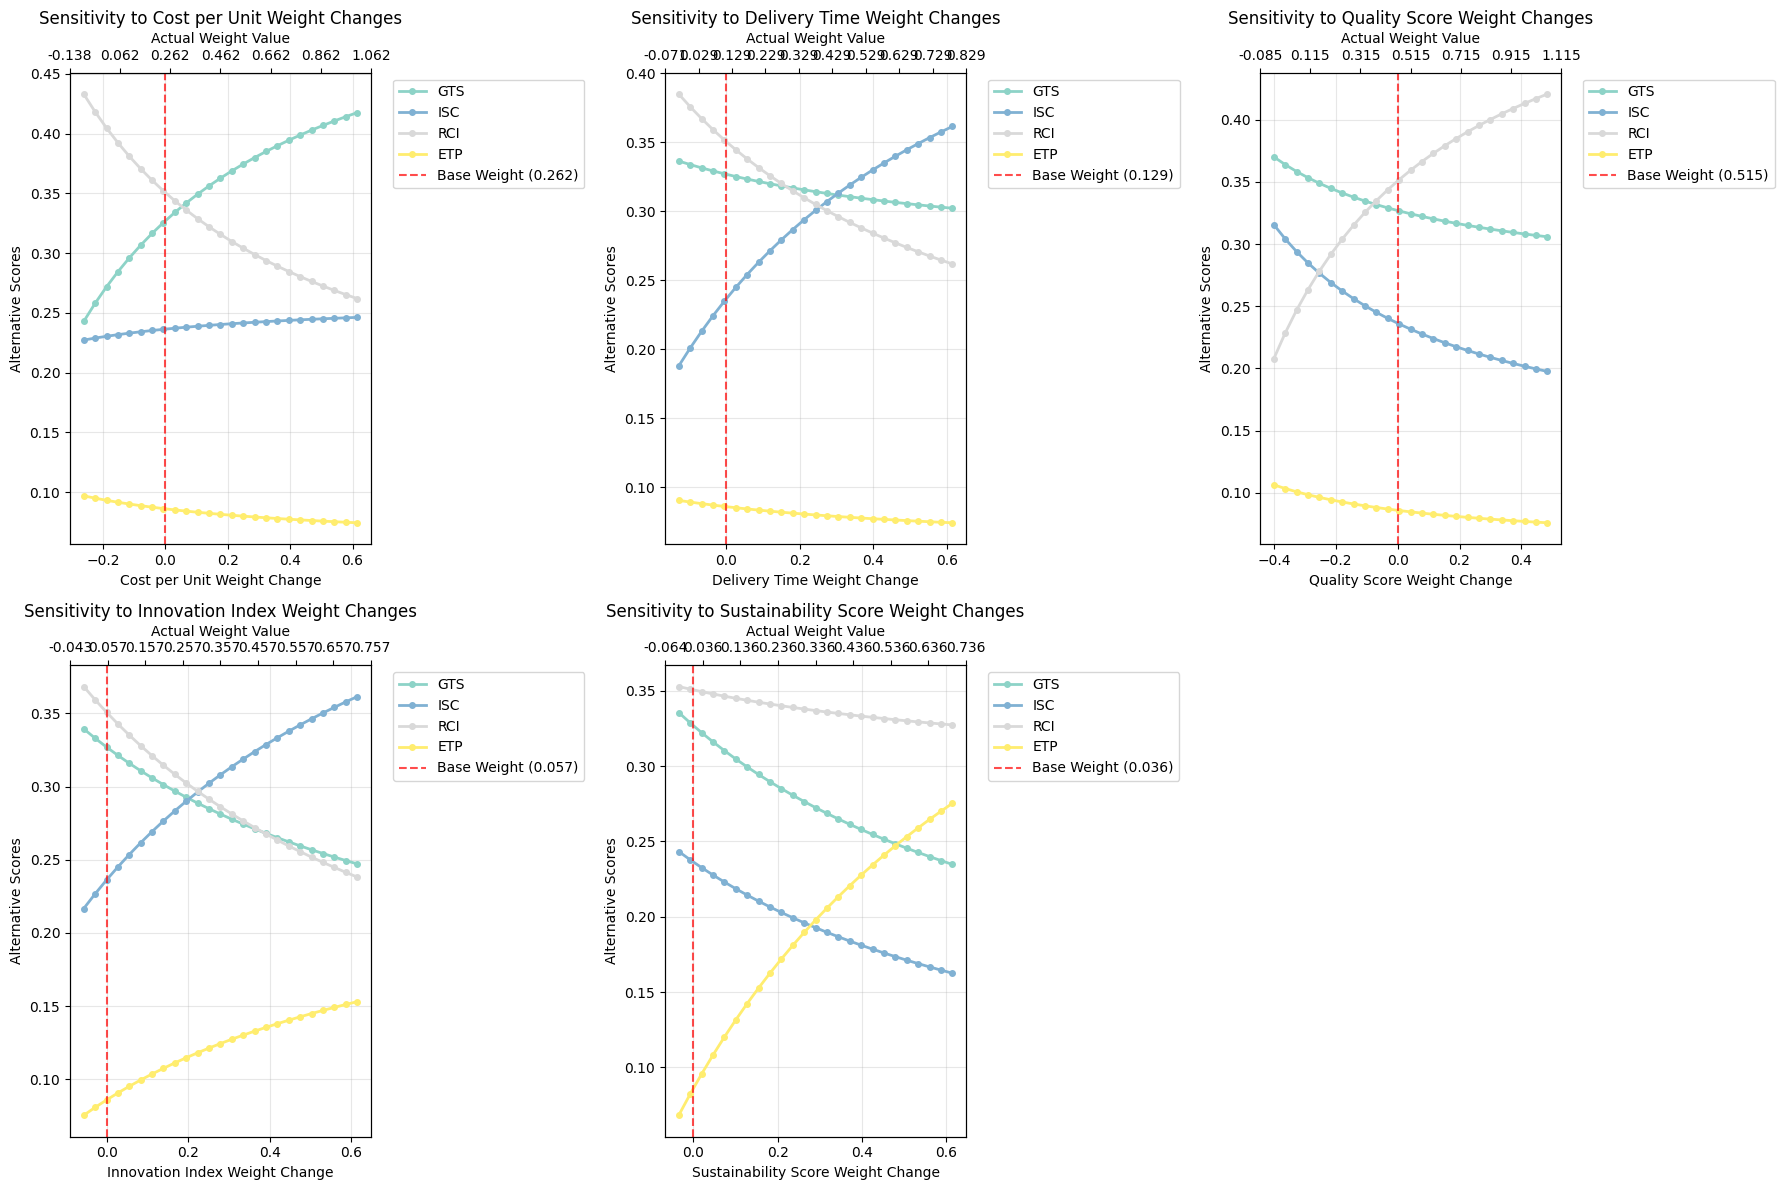

In [36]:
# Visualize sensitivity analysis results
def plot_criteria_sensitivity(sensitivity_results, criteria, alternatives, base_weights):
    """Plot sensitivity analysis results for all criteria"""
    
    n_criteria = len(criteria)
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    colors = plt.cm.Set3(np.linspace(0, 1, len(alternatives)))
    
    for idx, (criterion, results) in enumerate(sensitivity_results.items()):
        ax = axes[idx]
        
        # Extract data for plotting
        weight_changes = [r['weight_change'] for r in results]
        new_weights = [r['new_weight'] for r in results]
        
        # Plot score lines for each alternative
        for alt_idx, alternative in enumerate(alternatives):
            scores = [r['scores'][alt_idx] for r in results]
            ax.plot(weight_changes, scores, 'o-', 
                   color=colors[alt_idx], label=alternative, 
                   linewidth=2, markersize=4)
        
        # Mark the base weight position
        base_weight = base_weights[idx]
        ax.axvline(x=0, color='red', linestyle='--', alpha=0.7, 
                  label=f'Base Weight ({base_weight:.3f})')
        
        # Formatting
        ax.set_xlabel(f'{criterion} Weight Change')
        ax.set_ylabel('Alternative Scores')
        ax.set_title(f'Sensitivity to {criterion} Weight Changes')
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.grid(True, alpha=0.3)
        
        # Add second x-axis showing actual weights
        ax2 = ax.twiny()
        ax2.set_xlim(ax.get_xlim())
        weight_ticks = ax.get_xticks()
        actual_weights = [base_weight + change for change in weight_ticks]
        ax2.set_xticks(weight_ticks)
        ax2.set_xticklabels([f'{w:.3f}' for w in actual_weights])
        ax2.set_xlabel('Actual Weight Value')
    
    # Remove empty subplot
    if len(criteria) < len(axes):
        fig.delaxes(axes[-1])
    
    plt.tight_layout()
    plt.show()

# Create the sensitivity plots
plot_criteria_sensitivity(sensitivity_results, criteria, alternatives, criteria_weights)

In [37]:
### 2. Critical Threshold Analysis

def find_critical_thresholds(base_weights, synthesis_matrix, alternatives, criteria):
    """
    Find the critical thresholds where ranking changes occur
    """
    
    print("CRITICAL THRESHOLD ANALYSIS")
    print("=" * 40)
    
    original_scores = np.dot(synthesis_matrix, base_weights)
    original_ranking = np.argsort(-original_scores)
    current_winner = alternatives[original_ranking[0]]
    current_runner_up = alternatives[original_ranking[1]]
    
    print(f"Current Winner: {current_winner}")
    print(f"Current Runner-up: {current_runner_up}")
    print(f"Score Gap: {original_scores[original_ranking[0]] - original_scores[original_ranking[1]]:.4f}")
    print()
    
    critical_thresholds = {}
    
    for criterion_idx, criterion in enumerate(criteria):
        print(f"Critical analysis for {criterion}:")
        print("-" * (20 + len(criterion)))
        
        base_weight = base_weights[criterion_idx]
        
        # Binary search to find critical threshold
        def test_ranking_change(weight_change):
            modified_weights = base_weights.copy()
            modified_weights[criterion_idx] = base_weight + weight_change
            # Normalize weights
            modified_weights = modified_weights / np.sum(modified_weights)
            new_scores = np.dot(synthesis_matrix, modified_weights)
            new_ranking = np.argsort(-new_scores)
            return alternatives[new_ranking[0]] != current_winner
        
        # Find positive threshold
        pos_threshold = None
        for change in np.arange(0.001, 1, 0.001):
            if base_weight + change <= 1 and test_ranking_change(change):
                pos_threshold = change
                break
        
        # Find negative threshold  
        neg_threshold = None
        for change in np.arange(-0.001, 1, -0.001):
            if base_weight + change >= 0 and test_ranking_change(change):
                neg_threshold = change
                break
        
        critical_thresholds[criterion] = {
            'positive_threshold': pos_threshold,
            'negative_threshold': neg_threshold,
            'base_weight': base_weight
        }
        
        # Report results
        if pos_threshold:
            new_weight_pos = base_weight + pos_threshold
            print(f"  Positive threshold: +{pos_threshold:.4f} (weight becomes {new_weight_pos:.4f})")
        else:
            print(f"  Positive threshold: Not found in range")
            
        if neg_threshold:
            new_weight_neg = base_weight + neg_threshold  
            print(f"  Negative threshold: {neg_threshold:.4f} (weight becomes {new_weight_neg:.4f})")
        else:
            print(f"  Negative threshold: Not found in range")
        
        # Calculate stability measure
        if pos_threshold and neg_threshold:
            stability = min(abs(pos_threshold), abs(neg_threshold))
            print(f"  Stability measure: ±{stability:.4f}")
        elif pos_threshold:
            print(f"  Stability measure: +{pos_threshold:.4f}")
        elif neg_threshold:
            print(f"  Stability measure: {neg_threshold:.4f}")
        else:
            print(f"  Stability measure: Very stable (no threshold found)")
        
        print()
    
    return critical_thresholds

# Perform critical threshold analysis
critical_thresholds = find_critical_thresholds(criteria_weights, synthesis_matrix_new, alternatives, criteria)

CRITICAL THRESHOLD ANALYSIS
Current Winner: RCI
Current Runner-up: GTS
Score Gap: 0.0238

Critical analysis for Cost per Unit:
---------------------------------
  Positive threshold: +0.0540 (weight becomes 0.3161)
  Negative threshold: Not found in range
  Stability measure: +0.0540

Critical analysis for Delivery Time:
---------------------------------
  Positive threshold: +0.1650 (weight becomes 0.2943)
  Negative threshold: Not found in range
  Stability measure: +0.1650

Critical analysis for Quality Score:
---------------------------------
  Positive threshold: Not found in range
  Negative threshold: Not found in range
  Stability measure: Very stable (no threshold found)

Critical analysis for Innovation Index:
------------------------------------
  Positive threshold: +0.2250 (weight becomes 0.2825)
  Negative threshold: Not found in range
  Stability measure: +0.2250

Critical analysis for Sustainability Score:
----------------------------------------
  Positive threshold: +

In [46]:
### 3. Monte Carlo Sensitivity Analysis

def monte_carlo_sensitivity(base_weights, synthesis_matrix, alternatives, 
                          criteria, n_simulations=1000, uncertainty_level=0.1):
    """
    Perform Monte Carlo simulation to assess decision robustness
    
    Parameters:
    - base_weights: Original criteria weights
    - synthesis_matrix: Alternative priorities matrix
    - alternatives: List of alternative names
    - criteria: List of criteria names  
    - n_simulations: Number of Monte Carlo simulations
    - uncertainty_level: Standard deviation as fraction of base weight
    """
    
    print("MONTE CARLO SENSITIVITY ANALYSIS")
    print("=" * 40)
    print(f"Number of simulations: {n_simulations:,}")
    print(f"Uncertainty level: ±{uncertainty_level*100:.1f}% of base weights")
    print()
    
    # Store results
    simulation_results = []
    ranking_counts = {alt: 0 for alt in alternatives}
    position_counts = {alt: {pos: 0 for pos in range(len(alternatives))} for alt in alternatives}
    
    np.random.seed(42)  # For reproducible results
    
    for sim in range(n_simulations):
        # Generate random weights around base weights
        random_weights = np.random.normal(base_weights, base_weights * uncertainty_level)
        
        # Ensure all weights are positive and normalize
        random_weights = np.maximum(random_weights, 0.00001)
        random_weights = random_weights / np.sum(random_weights)
        
        # Calculate scores with random weights
        sim_scores = np.dot(synthesis_matrix, random_weights)
        sim_ranking = np.argsort(-sim_scores)
        
        # Record results
        winner = alternatives[sim_ranking[0]]
        ranking_counts[winner] += 1
        
        # Record position counts
        for pos, alt_idx in enumerate(sim_ranking):
            alt_name = alternatives[alt_idx]
            position_counts[alt_name][pos] += 1
        
        simulation_results.append({
            'weights': random_weights.copy(),
            'scores': sim_scores.copy(),
            'ranking': sim_ranking.copy(),
            'winner': winner
        })
    
    # Calculate statistics
    print("SIMULATION RESULTS:")
    print("-" * 30)
    
    # Winner frequency
    print("Winner Frequency:")
    for alt in alternatives:
        freq = ranking_counts[alt] / n_simulations
        print(f"  {alt:<22}: {ranking_counts[alt]:,} times ({freq:.1%})")
    
    print()
    
    # Position stability analysis
    print("Position Stability Analysis:")
    print("-" * 30)
    
    position_stability = {}
    for alt in alternatives:
        positions = position_counts[alt]
        # Calculate most frequent position
        most_frequent_pos = max(positions.keys(), key=lambda x: positions[x])
        stability = positions[most_frequent_pos] / n_simulations
        position_stability[alt] = {
            'most_frequent_position': most_frequent_pos + 1,  # 1-indexed
            'stability': stability
        }
        
        print(f"{alt}:")
        print(f"  Most frequent position: #{most_frequent_pos + 1}")
        print(f"  Position stability: {stability:.1%}")
        
        # Show distribution across positions
        print(f"  Position distribution: ", end="")
        for pos in range(len(alternatives)):
            count = positions[pos]
            if count > 0:
                print(f"#{pos+1}: {count/n_simulations:.1%} ", end="")
        print()
        print()
    
    return simulation_results, position_stability

# Perform Monte Carlo analysis
mc_results, position_stability = monte_carlo_sensitivity(
    criteria_weights, 
    synthesis_matrix_new, 
    alternatives, 
    criteria,
    n_simulations=20_000,
    uncertainty_level=0.15  # ±15% uncertainty
)

MONTE CARLO SENSITIVITY ANALYSIS
Number of simulations: 20,000
Uncertainty level: ±15.0% of base weights

SIMULATION RESULTS:
------------------------------
Winner Frequency:
  GTS                   : 4,240 times (21.2%)
  ISC                   : 0 times (0.0%)
  RCI                   : 15,760 times (78.8%)
  ETP                   : 0 times (0.0%)

Position Stability Analysis:
------------------------------
GTS:
  Most frequent position: #2
  Position stability: 78.8%
  Position distribution: #1: 21.2% #2: 78.8% 

ISC:
  Most frequent position: #3
  Position stability: 99.9%
  Position distribution: #2: 0.1% #3: 99.9% 

RCI:
  Most frequent position: #1
  Position stability: 78.8%
  Position distribution: #1: 78.8% #2: 21.1% #3: 0.1% 

ETP:
  Most frequent position: #4
  Position stability: 100.0%
  Position distribution: #4: 100.0% 



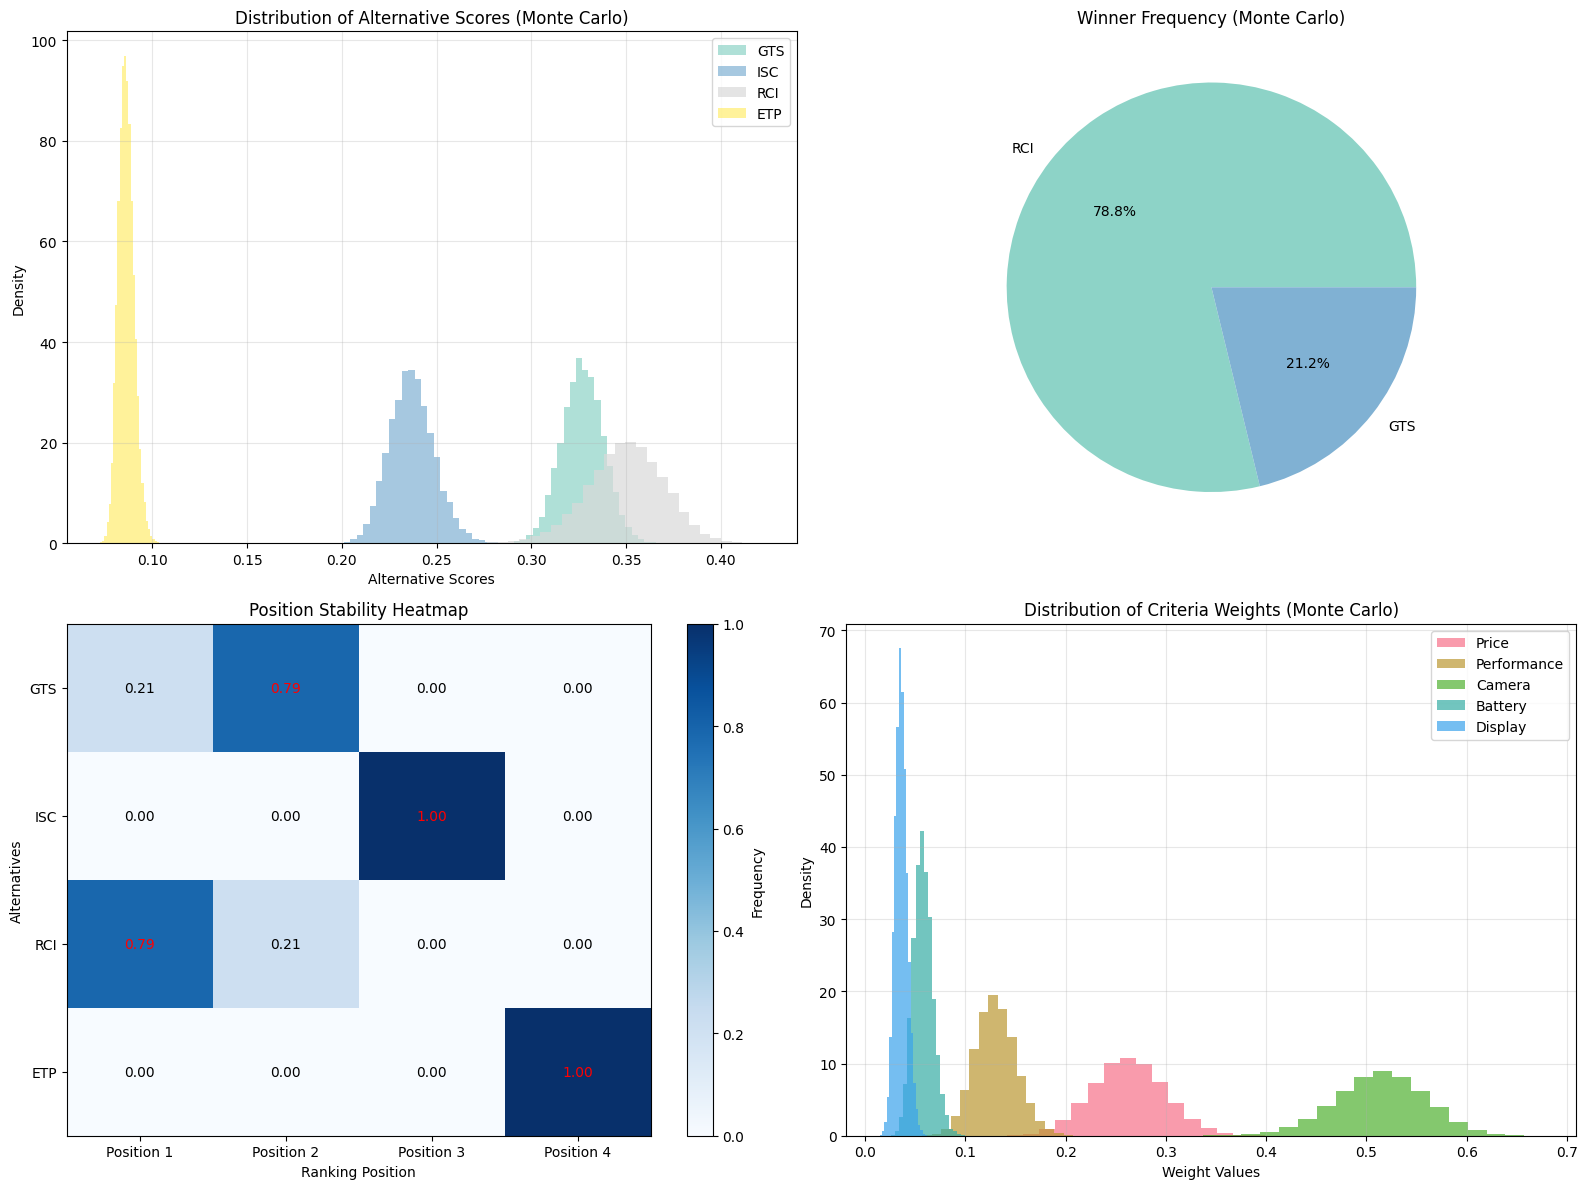

In [39]:
# Visualize Monte Carlo results
def plot_monte_carlo_results(mc_results, alternatives, position_stability):
    """Visualize Monte Carlo simulation results"""
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Score distributions
    colors = plt.cm.Set3(np.linspace(0, 1, len(alternatives)))
    
    for i, alt in enumerate(alternatives):
        scores = [result['scores'][i] for result in mc_results]
        ax1.hist(scores, bins=30, alpha=0.7, color=colors[i], label=alt, density=True)
    
    ax1.set_xlabel('Alternative Scores')
    ax1.set_ylabel('Density')
    ax1.set_title('Distribution of Alternative Scores (Monte Carlo)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. Winner frequency pie chart
    winner_counts = {}
    for result in mc_results:
        winner = result['winner']
        winner_counts[winner] = winner_counts.get(winner, 0) + 1
    
    ax2.pie(winner_counts.values(), labels=winner_counts.keys(), autopct='%1.1f%%',
           colors=colors[:len(winner_counts)])
    ax2.set_title('Winner Frequency (Monte Carlo)')
    
    # 3. Position stability heatmap
    position_matrix = np.zeros((len(alternatives), len(alternatives)))
    for alt_idx, alt in enumerate(alternatives):
        total_sims = len(mc_results)
        for result in mc_results:
            position = np.where(result['ranking'] == alt_idx)[0][0]
            position_matrix[alt_idx, position] += 1
        position_matrix[alt_idx] /= total_sims  # Convert to percentages
    
    im = ax3.imshow(position_matrix, cmap='Blues', aspect='auto')
    ax3.set_xticks(range(len(alternatives)))
    ax3.set_yticks(range(len(alternatives)))
    ax3.set_xticklabels([f'Position {i+1}' for i in range(len(alternatives))])
    ax3.set_yticklabels(alternatives)
    ax3.set_xlabel('Ranking Position')
    ax3.set_ylabel('Alternatives')
    ax3.set_title('Position Stability Heatmap')
    
    # Add text annotations
    for i in range(len(alternatives)):
        for j in range(len(alternatives)):
            text = ax3.text(j, i, f'{position_matrix[i, j]:.2f}',
                           ha="center", va="center", color="red" if position_matrix[i, j] > 0.5 else "black")
    
    plt.colorbar(im, ax=ax3, label='Frequency')
    
    # 4. Criteria weight distributions
    weight_data = np.array([result['weights'] for result in mc_results])
    
    for i, criterion in enumerate(['Price', 'Performance', 'Camera', 'Battery', 'Display']):
        ax4.hist(weight_data[:, i], bins=20, alpha=0.7, label=criterion, density=True)
    
    ax4.set_xlabel('Weight Values')
    ax4.set_ylabel('Density')
    ax4.set_title('Distribution of Criteria Weights (Monte Carlo)')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Create Monte Carlo visualizations
plot_monte_carlo_results(mc_results, alternatives, position_stability)

In [40]:
### 4. Comprehensive Sensitivity Analysis Summary

def generate_sensitivity_summary(original_ranking, critical_thresholds, position_stability, mc_results):
    """Generate a comprehensive summary of sensitivity analysis results"""
    
    print("COMPREHENSIVE SENSITIVITY ANALYSIS SUMMARY")
    print("=" * 60)
    
    # Original decision
    print("ORIGINAL DECISION:")
    print("-" * 20)
    print(f"Recommended choice: {original_ranking[0]}")
    print(f"Original ranking: {' > '.join(original_ranking)}")
    print()
    
    # Robustness assessment
    print("ROBUSTNESS ASSESSMENT:")
    print("-" * 25)
    
    # Calculate overall stability score
    most_stable_criterion = None
    least_stable_criterion = None
    min_threshold = float('inf')
    max_threshold = 0
    
    for criterion, thresholds in critical_thresholds.items():
        pos_thresh = thresholds['positive_threshold']
        neg_thresh = thresholds['negative_threshold']
        
        if pos_thresh and neg_thresh:
            min_abs_threshold = min(abs(pos_thresh), abs(neg_thresh))
            if min_abs_threshold < min_threshold:
                min_threshold = min_abs_threshold
                least_stable_criterion = criterion
            if min_abs_threshold > max_threshold:
                max_threshold = min_abs_threshold
                most_stable_criterion = criterion
    
    if most_stable_criterion:
        print(f"Most stable criterion: {most_stable_criterion}")
        print(f"Least stable criterion: {least_stable_criterion}")
        print(f"Minimum stability threshold: ±{min_threshold:.4f}")
        print()
    
    # Monte Carlo confidence
    winner_from_mc = max(position_stability.keys(), 
                        key=lambda x: position_stability[x]['stability'])
    mc_confidence = position_stability[winner_from_mc]['stability']
    
    print(f"Monte Carlo Analysis:")
    print(f"  Most stable alternative: {winner_from_mc}")
    print(f"  Position confidence: {mc_confidence:.1%}")
    
    # Risk assessment
    if mc_confidence >= 0.8:
        risk_level = "LOW"
    elif mc_confidence >= 0.6:
        risk_level = "MEDIUM"
    else:
        risk_level = "HIGH"

    print(f"  Decision risk level: {risk_level}")
    print()
    
    # Recommendations
    print("RECOMMENDATIONS:")
    print("-" * 15)
    
    if mc_confidence >= 0.8 and min_threshold > 0.1:
        print("ROBUST DECISION: The decision is highly stable.")
        print("   The ranking is unlikely to change with reasonable variations in judgments.")
        
    elif mc_confidence >= 0.6 or min_threshold > 0.05:
        print("MODERATELY ROBUST: The decision is reasonably stable.")
        print("   Consider validating critical judgments, especially for the least stable criterion.")
        print(f"   Pay special attention to: {least_stable_criterion}")
        
    else:
        print("UNSTABLE DECISION: The decision is sensitive to small changes.")
        print("   Recommend:")
        print("   1. Gather more information to refine judgments")
        print("   2. Consider additional criteria or alternatives")
        print("   3. Conduct group decision-making to reduce bias")
        print("   4. Re-evaluate the problem structure")
    
    print()
    
    # Key insights
    print("KEY INSIGHTS:")
    print("-" * 12)
    
    # Find criteria with highest impact
    winner_counts = {}
    for result in mc_results:
        winner = result['winner']
        winner_counts[winner] = winner_counts.get(winner, 0) + 1
    
    original_winner = original_ranking[0]
    mc_winner_freq = winner_counts.get(original_winner, 0) / len(mc_results)
    
    print(f"1. Original winner ({original_winner}) remains top choice in {mc_winner_freq:.1%} of simulations")
    
    if least_stable_criterion:
        print(f"2. Decision is most sensitive to changes in '{least_stable_criterion}' criterion")
    
    # Alternative insights
    alt_insights = []
    for alt in alternatives:
        stability = position_stability[alt]['stability']
        freq_position = position_stability[alt]['most_frequent_position']
        if stability > 0.7:
            alt_insights.append(f"{alt} consistently ranks #{freq_position} ({stability:.1%} stability)")
    
    if alt_insights:
        print("3. Stable alternatives:")
        for insight in alt_insights:
            print(f"   - {insight}")
    
    print()
    
    return {
        'risk_level': risk_level,
        'confidence': mc_confidence,
        'most_stable_criterion': most_stable_criterion,
        'least_stable_criterion': least_stable_criterion,
        'min_threshold': min_threshold if min_threshold != float('inf') else None
    }

# Generate comprehensive summary
summary = generate_sensitivity_summary(
    [alternatives[i] for i in np.argsort(-final_scores_new)],
    critical_thresholds,
    position_stability,
    mc_results
)

COMPREHENSIVE SENSITIVITY ANALYSIS SUMMARY
ORIGINAL DECISION:
--------------------
Recommended choice: RCI
Original ranking: RCI > GTS > ISC > ETP

ROBUSTNESS ASSESSMENT:
-------------------------
Monte Carlo Analysis:
  Most stable alternative: ETP
  Position confidence: 100.0%
  Decision risk level: LOW

RECOMMENDATIONS:
---------------
ROBUST DECISION: The decision is highly stable.
   The ranking is unlikely to change with reasonable variations in judgments.

KEY INSIGHTS:
------------
1. Original winner (RCI) remains top choice in 78.8% of simulations
3. Stable alternatives:
   - GTS consistently ranks #2 (78.8% stability)
   - ISC consistently ranks #3 (99.9% stability)
   - RCI consistently ranks #1 (78.8% stability)
   - ETP consistently ranks #4 (100.0% stability)



### 5. Practical Guidelines for Sensitivity Analysis in AHP

#### When to Perform Sensitivity Analysis

1. **Always perform sensitivity analysis** when:
   - Making important decisions with significant consequences
   - Working with uncertain or subjective judgments
   - Multiple stakeholders are involved
   - The decision will be implemented over a long time period

2. **Key scenarios requiring sensitivity analysis**:
   - Close competition between top alternatives
   - High inconsistency ratios (CR > 0.05)
   - Disagreement among decision makers
   - Limited confidence in pairwise comparisons

#### Interpreting Sensitivity Analysis Results

**Confidence Levels:**
- **High Confidence (>80% stability)**: Decision is robust and reliable
- **Medium Confidence (60-80% stability)**: Decision is reasonable but monitor key factors
- **Low Confidence (<60% stability)**: Decision requires careful review and validation

**Critical Threshold Interpretation:**
- **Threshold > 20%**: Very stable decision
- **Threshold 10-20%**: Moderately stable decision  
- **Threshold 5-10%**: Somewhat sensitive decision
- **Threshold < 5%**: Highly sensitive decision requiring attention

#### Best Practices

1. **Systematic Approach**:
   - Always start with criteria weight sensitivity
   - Focus on the most important criteria first
   - Test alternative priority sensitivity for close competitors
   - Use Monte Carlo for overall uncertainty assessment

2. **Documentation**:
   - Record all assumptions and uncertainty levels
   - Document critical thresholds and their business implications
   - Maintain sensitivity analysis results for future reference

3. **Decision Making**:
   - Use sensitivity analysis to identify where more precision is needed
   - Consider the cost of gathering additional information vs. decision risk
   - Involve stakeholders in reviewing sensitivity results

4. **Validation**:
   - Compare sensitivity results with expert intuition
   - Test extreme but plausible scenarios
   - Validate using independent assessment methods when possible

#### Common Pitfalls to Avoid

**Don't:**
- Ignore sensitivity analysis for important decisions
- Assume small inconsistencies don't matter
- Use only one type of sensitivity analysis
- Make decisions based solely on point estimates

**Do:**
- Consider multiple sensitivity analysis methods
- Focus on practical significance, not just statistical significance
- Communicate uncertainty ranges to stakeholders
- Use sensitivity analysis to improve the decision process

---

## Practice Exercise

Apply the Analytic Hierarchy Process (AHP) to select the best laptop for a college student.

**Goal:** Select the best laptop for academic and personal use

**Criteria:**
- **Price** (cost criterion): Lower is better
- **Performance** (benefit criterion): Higher processing power is better
- **Battery Life** (benefit criterion): Longer battery life is better
- **Portability** (benefit criterion): Lighter weight and smaller size is better
- **Display Quality** (benefit criterion): Better screen resolution and quality

**Alternatives:**
1. **Dell XPS** - Premium ultrabook
2. **MacBook Air** - Apple's lightweight laptop
3. **Lenovo ThinkPad** - Business-focused ultrabook
4. **ASUS ZenBook** - Value-driven ultrabook

**Your Task:**
1. Define the decision hierarchy
2. Create pairwise comparison matrices for criteria
3. Create pairwise comparison matrices for alternatives under each criterion
4. Calculate priorities using the eigenvalue method using PyMCDM
5. Check consistency of all matrices (CR ≤ 0.10)
6. Synthesize results to get final ranking
7. Perform Sensitivity Analysis on the final ranking
8. Interpret the results and justify your choice

**Decision Context:**
- You're a college student with a budget of PHP 75,500 - PHP 100,000
- You need the laptop for programming, research, and multimedia
- Portability is important for carrying between classes
- Battery life matters for all-day use without outlets
- You prefer reliable build quality and good customer support

**Bonus Challenge:**
- Test how different criteria weightings affect the final ranking
- Consider adding a new alternative and analyze rank reversal